# Homicide Rate by Country
This project aims to make a report on the homicide rate in different countries, how various factors influence it and its behaviour over time: 
* Which are the countries with the highest number of homicides?
* What is the number of homicides per continent?
* What is the number of homicides by subregion?
* Number of homicides by subregion (Americas & Europe) and year.
* What is the sum of the homicide rates per year?
* Sum of homicides by country and year.
* Homicide count by subregion.


#### Import Libraries that Required for doing Analysis


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load The Data For analysis

In [3]:
df = pd.read_csv("homicide_by_countries.csv")
df.head()

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012


In [5]:
df.shape

(195, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Location   195 non-null    object 
 1   Region     195 non-null    object 
 2   Subregion  195 non-null    object 
 3   Rate       195 non-null    float64
 4   Count      195 non-null    int64  
 5   Year       195 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.3+ KB


In [9]:
df.isnull().sum()

# df.dropna(inplace=True)
# df.dropna(subset = ["column_name"], inplace = True)

Location     0
Region       0
Subregion    0
Rate         0
Count        0
Year         0
dtype: int64

In [11]:
df.dtypes

Location      object
Region        object
Subregion     object
Rate         float64
Count          int64
Year           int64
dtype: object

In [13]:
df["Rate"] = df["Rate"].astype(int)

In [15]:
df.dtypes

Location     object
Region       object
Subregion    object
Rate          int32
Count         int64
Year          int64
dtype: object

In [17]:
mylist = {"Rate", "Count", "Year"}
for i in  mylist:
    print(i)
    df[i] = df[i].astype('int') 

Year
Count
Rate


In [19]:
df.dtypes

Location     object
Region       object
Subregion    object
Rate          int32
Count         int32
Year          int32
dtype: object

In [21]:
df["Region"].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

In [23]:
df["Region"]= df["Region"].replace("Americas", "N/S America")
df["Region"].unique()

array(['Asia', 'Europe', 'Africa', 'N/S America', 'Oceania'], dtype=object)

In [27]:
df.describe(include="all")

,Location,Region,Subregion,Rate,Count,Year
count,195,195,195,195.000000,195.000000,195.000000
unique,195,5,19,NaN,NaN,NaN
top,Afghanistan,Asia,Caribbean,NaN,NaN,NaN
freq,1,51,25,NaN,NaN,NaN
mean,NaN,NaN,NaN,6.410256,1942.800000,2017.420513
std,NaN,NaN,NaN,9.591443,6553.343376,3.589445
min,NaN,NaN,NaN,0.000000,0.000000,2006.000000
25%,NaN,NaN,NaN,1.000000,28.000000,2016.000000
50%,NaN,NaN,NaN,2.000000,128.000000,2019.000000
75%,NaN,NaN,NaN,7.000000,785.000000,2020.000000


#### Which are the countries with the highest number of homicides?

##### for reseting index
df1 = df.sort_values("Count", ascending = False).reset_index(drop = True)


In [31]:
df.sort_values("Count", ascending = False)

,Location,Region,Subregion,Rate,Count,Year
26,Brazil,N/S America,South America,22,47722,2020
125,Nigeria,Africa,Western Africa,22,44200,2019
78,India,Asia,Southern Asia,3,40651,2020
111,Mexico,N/S America,Central America,28,36579,2020
186,United States,N/S America,Northern America,6,21570,2020
...,...,...,...,...,...,...
73,Holy See,Europe,Southern Europe,0,0,2015
38,Channel Islands,Europe,Northern Europe,0,0,2010
145,Saint Helena,Africa,Western Africa,0,0,2009
151,San Marino,Europe,Southern Europe,0,0,2011


In [35]:
df[["Location", "Count"]]

,Location,Count
0,Afghanistan,2474
1,Albania,61
2,Algeria,580
3,Andorra,2
4,Angola,1217
...,...,...
190,Venezuela,10598
191,Vietnam,1358
192,Yemen,1703
193,Zambia,853


In [37]:
# Creating a DataFrame Of Top Five Countries of migrants as per count
df1 = df[["Location", "Count"]].sort_values(by = "Count", ascending = False).head(5)
# create percentage column for df1 
df1["Percent"] = (df1["Count"] * 100 / df1["Count"].sum()).round(2)
df1

,Location,Count,Percent
26,Brazil,47722,25.02
125,Nigeria,44200,23.18
78,India,40651,21.31
111,Mexico,36579,19.18
186,United States,21570,11.31


<Axes: ylabel='Count'>

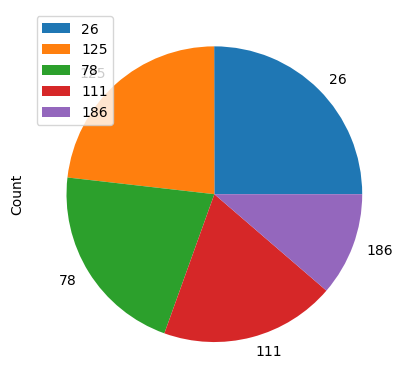

In [39]:
df1.plot(x="Location", y="Count", kind="pie")

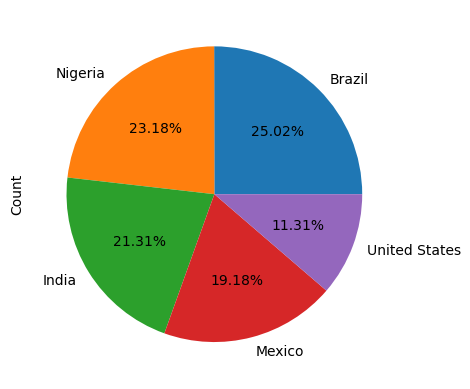

In [32]:
df1.plot(x="Location", y="Count", kind="pie", labels = df1.Location, autopct="%0.2f%%")
plt.legend().set_visible(False)

#### What is the number of homicides per continent?

In [43]:
df2 = df.groupby("Region")["Count"].sum().sort_values(ascending = False)
df2

Region
N/S America    153597
Asia           105552
Africa          99481
Europe          19869
Oceania           347
Name: Count, dtype: int32

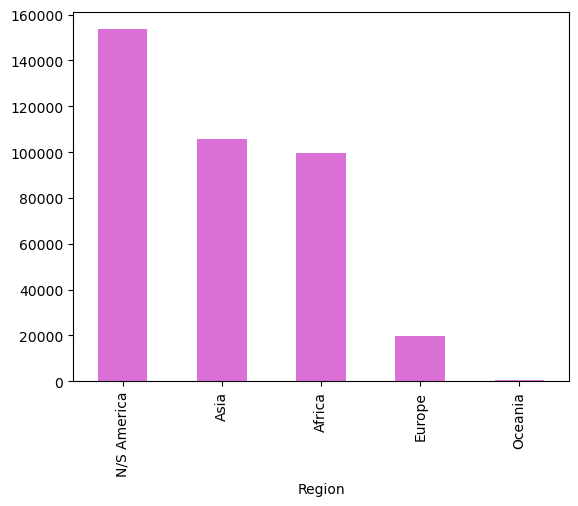

In [45]:
df2.plot(kind = "bar", color="orchid")
plt.show()

#### What is the number of homicides by subregion?

In [47]:
df3 = df.groupby("Subregion")["Count"].sum().sort_values(ascending = False)
df3

Subregion
South America             78872
Southern Asia             58631
Central America           47371
Western Africa            46318
South-Eastern Asia        25314
Eastern Africa            23669
Northern America          22317
Southern Africa           21479
Eastern Europe            14604
Western Asia              11638
Eastern Asia               8563
Northern Africa            5538
Caribbean                  5037
Middle Africa              2477
Northern Europe            2097
Western Europe             2075
Central Asia               1406
Southern Europe            1093
Australia, New Zealand      347
Name: Count, dtype: int32

In [43]:
df3.index

Index(['South America', 'Southern Asia', 'Central America', 'Western Africa',
       'South-Eastern Asia', 'Eastern Africa', 'Northern America',
       'Southern Africa', 'Eastern Europe', 'Western Asia', 'Eastern Asia',
       'Northern Africa', 'Caribbean', 'Middle Africa', 'Northern Europe',
       'Western Europe', 'Central Asia', 'Southern Europe',
       'Australia, New Zealand'],
      dtype='object', name='Subregion')

In [46]:
df3.values

array([78872, 58631, 47371, 46318, 25314, 23669, 22317, 21479, 14604,
       11638,  8563,  5538,  5037,  2477,  2097,  2075,  1406,  1093,
         347])

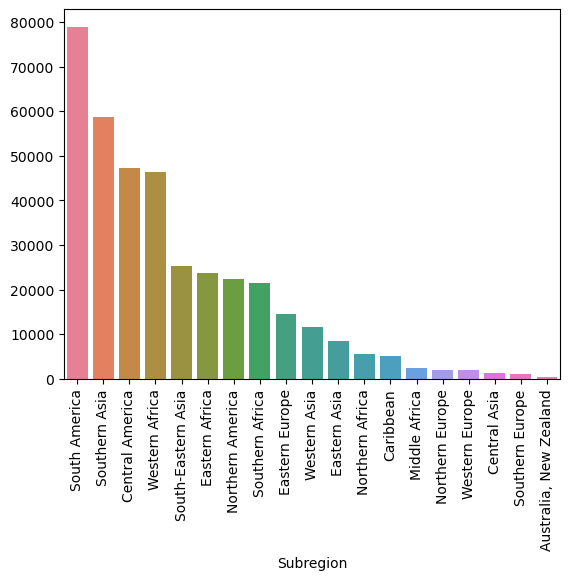

In [57]:
sns.barplot(x = df3.index, y= df3.values, hue = df3.index)  # palette = 'viridis'
plt.xticks(rotation = 90)  # rotation = "vertical"
# xlabel = None
plt.show()

#### Number of homicides by subregion (Asia & Europe) and year.

In [59]:
df.Year.value_counts()

Year
2020    94
2019    20
2018    13
2012    11
2017    10
2016     9
2015     9
2009     6
2014     5
2013     5
2011     5
2010     3
2006     2
2007     1
2021     1
2008     1
Name: count, dtype: int64

##### df4 = df[df["Region"].isin(["Asia", "Europe"])]

In [61]:
df4 = df[(df["Region"] == "Asia") | (df["Region"] == "Europe")]
df4

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
3,Andorra,Europe,Southern Europe,2,2,2020
8,Armenia,Asia,Western Asia,1,52,2020
11,Austria,Europe,Western Europe,0,65,2020
...,...,...,...,...,...,...
183,United Arab Emirates,Asia,Western Asia,0,64,2019
184,United Kingdom,Europe,Northern Europe,1,755,2018
189,Uzbekistan,Asia,Central Asia,1,396,2019
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011


In [63]:
df4 = df4[df4["Year"]>2016][['Region', 'Year', 'Count']]
df4

,Region,Year,Count
0,Asia,2018,2474
1,Europe,2020,61
3,Europe,2020,2
8,Asia,2020,52
11,Europe,2020,65
...,...,...,...
178,Asia,2020,2095
182,Europe,2017,2751
183,Asia,2019,64
184,Europe,2018,755


In [65]:
df4 = df4.groupby(["Region", "Year"]).sum()["Count"]
df4

Region  Year
Asia    2017     1787
        2018    16923
        2019     6458
        2020    53516
        2021    15299
Europe  2017     3670
        2018      883
        2019      249
        2020    15066
Name: Count, dtype: int32

In [67]:
df_unstacked = df4.unstack(level = 0)
df_unstacked

Region,Asia,Europe
Year,,
2017,1787.0,3670.0
2018,16923.0,883.0
2019,6458.0,249.0
2020,53516.0,15066.0
2021,15299.0,NaN


In [64]:
df_unstacked.index

Index([2017, 2018, 2019, 2020, 2021], dtype='int32', name='Year')

In [66]:
df_unstacked.index = df_unstacked.index.astype(str)
df_unstacked.index

Index(['2017', '2018', '2019', '2020', '2021'], dtype='object', name='Year')

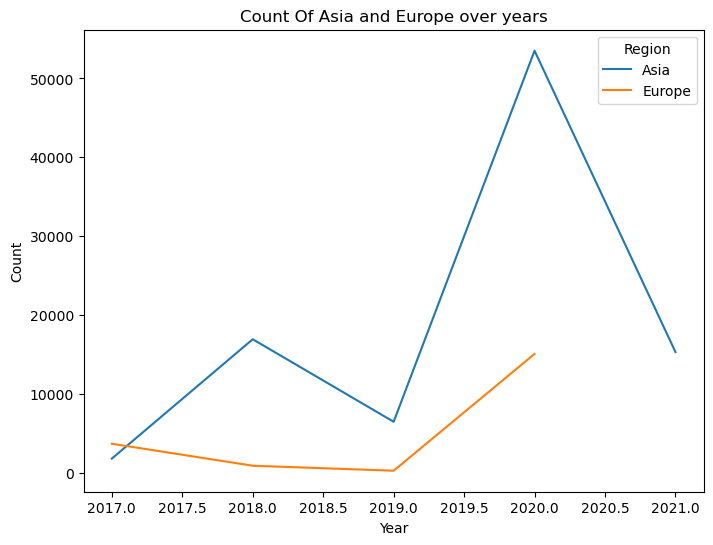

In [69]:
df_unstacked.plot(kind = 'line', figsize = (8, 6))
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Count Of Asia and Europe over years")
plt.show()

#### What is the sum of the homicide rates per year?

In [73]:
df5 = df.groupby(["Year"])["Rate"].sum().sort_values(ascending = False)
df5

Year
2020    564
2019    153
2012    113
2016     76
2018     64
2015     55
2014     52
2009     36
2021     28
2017     27
2013     20
2007     19
2010     18
2006     12
2011      8
2008      5
Name: Rate, dtype: int32

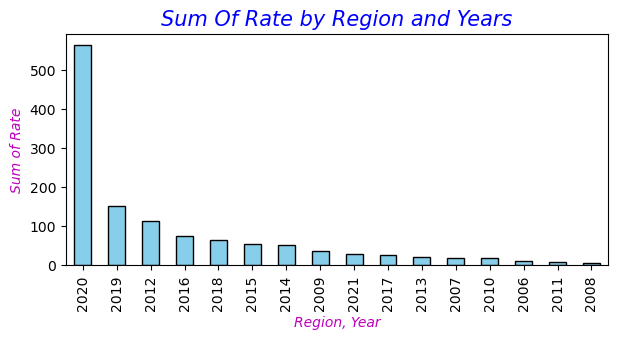

In [75]:
df5.plot(kind = 'bar', figsize = (7,3), color = 'skyblue', edgecolor = 'k')
plt.xlabel("Region, Year", c = 'm', fontsize=10, fontstyle='oblique')
plt.ylabel("Sum of Rate", c = 'm', fontsize=10, fontstyle='oblique')
plt.title("Sum Of Rate by Region and Years", c='blue',fontsize=15, fontstyle='italic') # ['normal', 'italic', 'oblique']
plt.show()

#### Sum of homicides count by Region and year.

In [42]:
df6 = df[["Year", "Region", "Count"]]
df6 = df6.groupby(["Year", "Region"]).sum().sort_values(by = "Year", ascending = False)
df6

Count
Year Region             
2021 Asia          15299
2020 Oceania         221
     N/S America  134784
     Europe        15066
     Asia          53516
     Africa        28460
2019 Europe          249
     Africa        44210
     Asia           6458
     N/S America    4276
     Oceania         126
2018 N/S America   13793
     Europe          883
     Asia          16923
2017 Europe         3670
     Asia           1787
     Africa         1467
2016 Asia            627
     N/S America     608
     Europe            0
     Africa         4987
2015 Asia            241
     Africa         2206
     Europe            0
2014 N/S America      13
     Asia           3029
2013 Asia           5782
2012 Africa        15264
     N/S America      53
     Asia             61
2011 Asia           1626
     Africa          855
     Europe            0
2010 Europe            1
     Africa          303
2009 N/S America      42
     Africa           27
2008 Africa         1702
2007 N/S America      26
2006 N/S America       2
     Asia            203

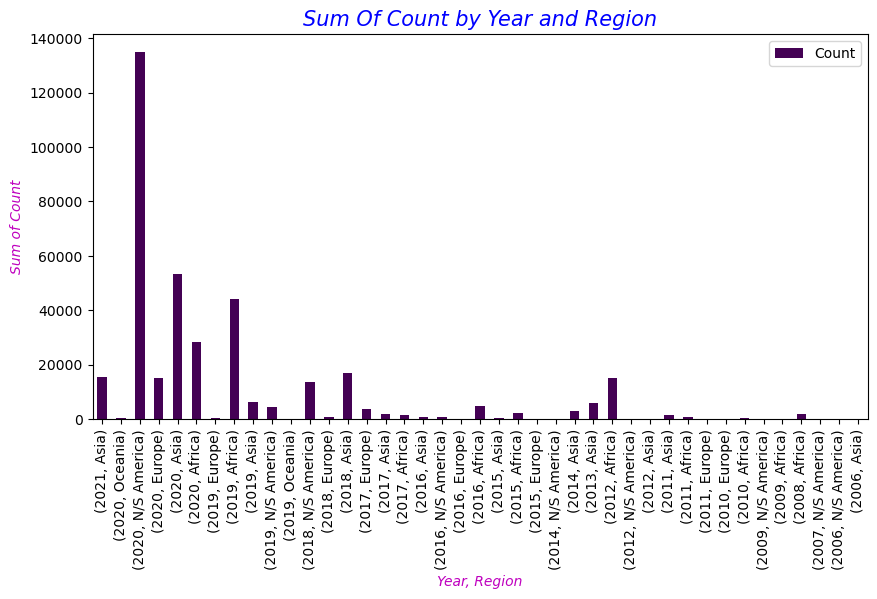

In [43]:
df6.plot(kind = 'bar', figsize = (10,5), colormap = 'viridis')
plt.xlabel("Year, Region", c = 'm', fontsize=10, fontstyle='oblique')
plt.ylabel("Sum of Count", c = 'm', fontsize=10, fontstyle='oblique')
plt.title("Sum Of Count by Year and Region", c='blue',fontsize=15, fontstyle='italic') # ['normal', 'italic', 'oblique']
plt.show()

#### Homicide count by subregion.

In [82]:
df7 = df.groupby("Subregion")["Count"].mean().sort_values(ascending = False).round(2)
df7

Subregion
Southern Asia             6514.56
South America             6067.08
Central America           5921.38
Northern America          4463.40
Southern Africa           4295.80
Western Africa            4210.73
South-Eastern Asia        2531.40
Eastern Africa            1577.93
Eastern Europe            1460.40
Eastern Asia              1223.29
Northern Africa           1107.60
Middle Africa              619.25
Western Asia               581.90
Central Asia               281.20
Western Europe             230.56
Caribbean                  201.48
Australia, New Zealand     173.50
Northern Europe            139.80
Southern Europe             64.29
Name: Count, dtype: float64

In [45]:
df7.index

Index(['Southern Asia', 'South America', 'Central America', 'Northern America',
       'Southern Africa', 'Western Africa', 'South-Eastern Asia',
       'Eastern Africa', 'Eastern Europe', 'Eastern Asia', 'Northern Africa',
       'Middle Africa', 'Western Asia', 'Central Asia', 'Western Europe',
       'Caribbean', 'Australia, New Zealand', 'Northern Europe',
       'Southern Europe'],
      dtype='object', name='Subregion')

In [46]:
df7.values

array([6514.56, 6067.08, 5921.38, 4463.4 , 4295.8 , 4210.73, 2531.4 ,
       1577.93, 1460.4 , 1223.29, 1107.6 ,  619.25,  581.9 ,  281.2 ,
        230.56,  201.48,  173.5 ,  139.8 ,   64.29])

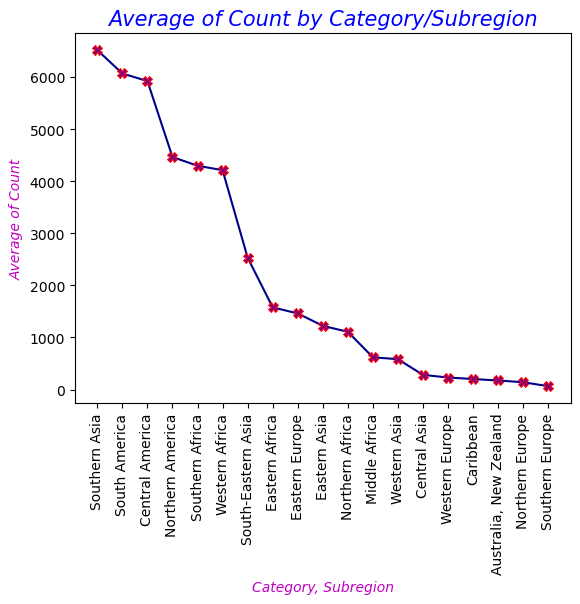

In [88]:
sns.lineplot(x=df7.index, y=df7.values, color = 'darkblue', marker='X', 
             ms=7, markerfacecolor ='purple', markeredgecolor = 'r')
plt.xticks(rotation = "vertical")
xlabel = None

plt.xlabel("Category, Subregion", c = 'm', fontsize=10, fontstyle='oblique')
plt.ylabel("Average of Count", c = 'm', fontsize=10, fontstyle='oblique')
plt.title("Average of Count by Category/Subregion", c='blue',fontsize=15, fontstyle='italic') # ['normal', 'italic', 'oblique']
plt.show()